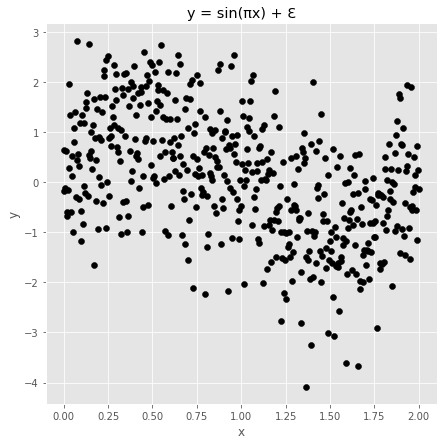

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

# for reproducibility across different runs, one may set a seed as follows:
# np.random.seed(42)

# number of observations
NUM_OBS = 500

# predictors
x = np.linspace(0, 2, num = NUM_OBS)
# noise
eps = np.random.normal(0, 1, NUM_OBS)
# outcome
y = np.sin(PI*x) + eps

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x, y, c = 'k')

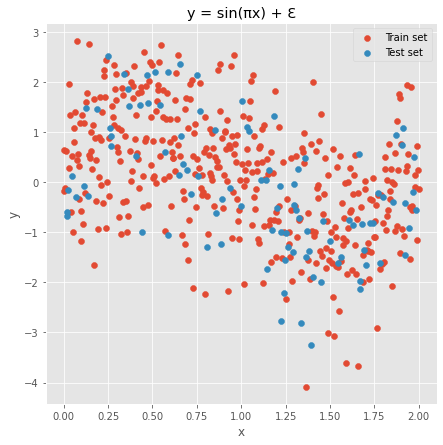

In [2]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly co

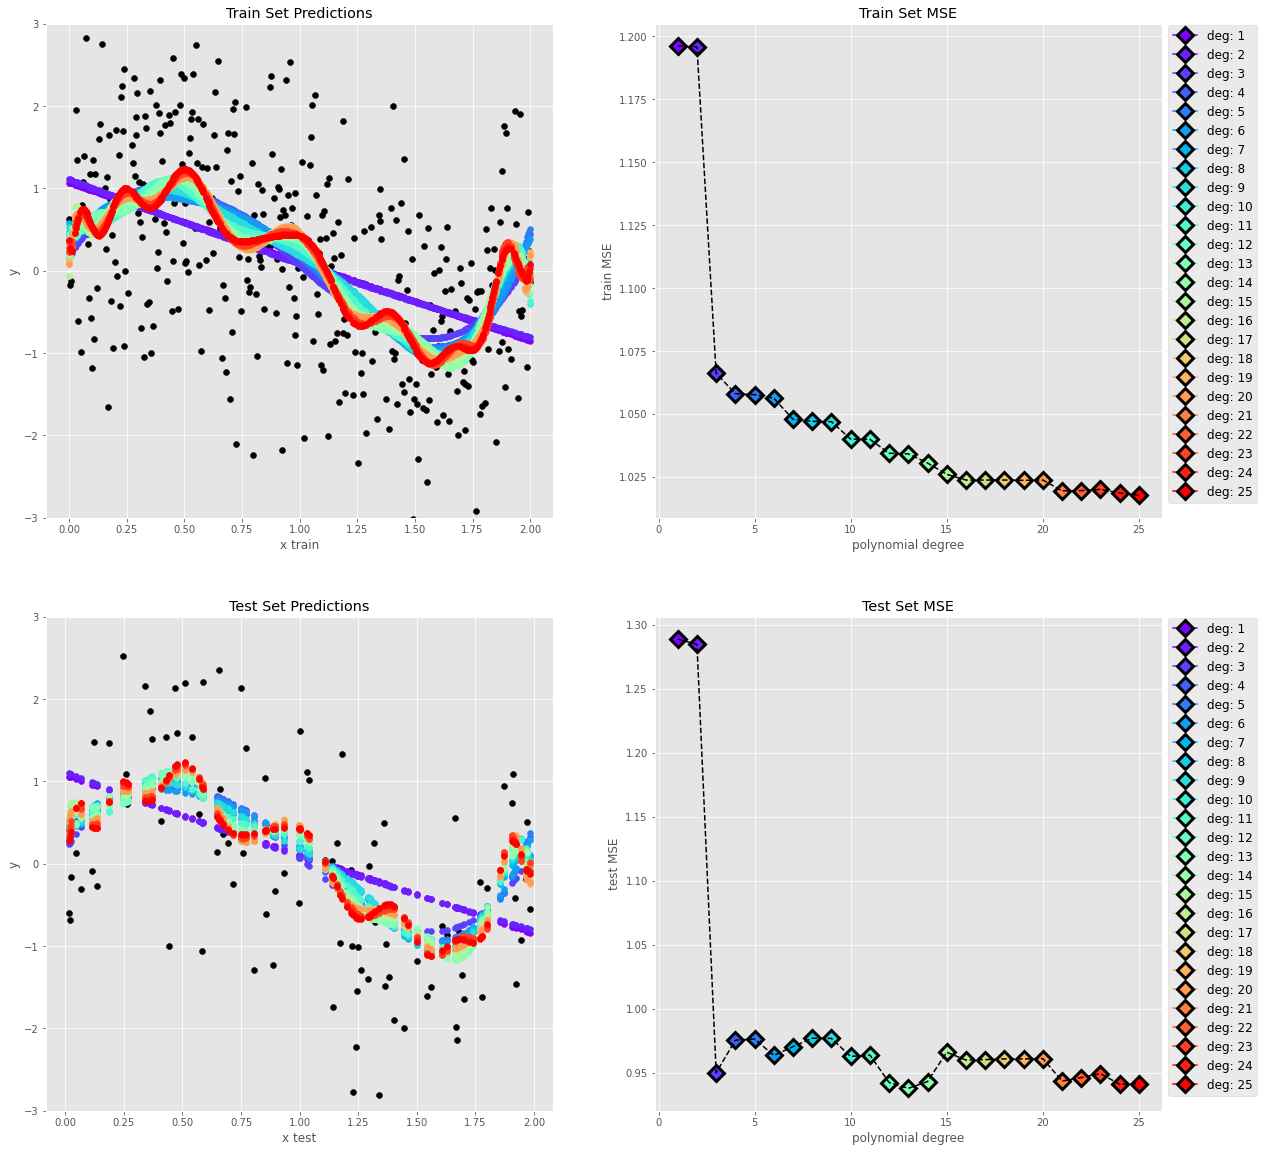

In [3]:
NUM_MODELS = 25

colors = iter(plt.cm.rainbow(np.linspace(0, 1, NUM_MODELS)))

fig, axs = plt.subplots(2, 2, figsize = (20,20))

axs[0, 0].set_title('Train Set Predictions')
axs[1, 0].set_title('Test Set Predictions')
axs[0, 1].set_title('Train Set MSE')
axs[1, 1].set_title('Test Set MSE')

axs[0, 0].set_xlabel("x train")
axs[0, 0].set_ylabel("y")
axs[0, 0].set_ylim([-3, 3])

axs[1, 0].set_xlabel("x test")
axs[1, 0].set_ylabel("y")
axs[1, 0].set_ylim([-3, 3])

axs[0, 1].set_xlabel("polynomial degree")
axs[0, 1].set_ylabel("train MSE")

axs[1, 1].set_xlabel("polynomial degree")
axs[1, 1].set_ylabel("test MSE")

axs[0,0].scatter(x_train, y_train, c = 'k', label = "y train")
axs[1,0].scatter(x_test, y_test, c = 'k', label = "y test")

train_mse = []
test_mse = []

for k in range(0, NUM_MODELS):

  c = next(colors)

  # k-th degree polynomial coefficients
  fit_coeff = np.polyfit(x_train, y_train, deg = k+1)

  # train and test k-th degree polynomial fit
  y_train_pred = np.polyval(fit_coeff, x_train)
  y_test_pred = np.polyval(fit_coeff, x_test)

  # plot train and test k-th degree polynomial fit
  axs[0,0].scatter(x_train,
                   y_train_pred,
                   color = c,
                   label = "deg: {}".format(k+1))
  
  axs[1,0].scatter(x_test,
                   y_test_pred,
                   color = c,
                   label = "deg: {}".format(k+1))

  # train and test MSE of k-th degree polynomial fit 
  iter_train_mse = mean_squared_error(y_train_pred, y_train)
  iter_test_mse = mean_squared_error(y_test_pred, y_test)

  train_mse.append(iter_train_mse)
  test_mse.append(iter_test_mse)

  # plot train and test MSE of k-th degree polynomial fit
  axs[0,1].plot(k+1,
                iter_train_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)
  
  axs[1,1].plot(k+1,
                iter_test_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)

# plot dashed line to interpolate MSE measures
axs[0,1].plot(range(1,NUM_MODELS+1), train_mse, 'k--')
axs[1,1].plot(range(1,NUM_MODELS+1), test_mse, 'k--')

# draw legends
axs[0,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})
axs[1,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})

In [4]:
print("Best fit polynomial degree: ", test_mse.index(min(test_mse)))

Best fit polynomial degree:  12
